<a href="https://colab.research.google.com/github/priyanka0178885547/ML-LAB/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold


In [3]:
df1=pd.read_csv("/content/titanic_train.csv")
df1.shape

(891, 12)

In [4]:
df1.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [5]:
[col for col in df1.columns if df1[col].isnull().sum()>0]

['Age', 'Cabin', 'Embarked']

In [6]:
df1[df1['Cabin'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
df1 = df1.drop('Cabin', axis=1)

In [8]:

df1['Age'] = df1['Age'].fillna(df1['Age'].mean())

In [9]:
df1=df1.drop('Embarked',axis=1)

In [10]:
X=df1.drop(labels='Survived',axis=1)
y=df1['Survived']

In [11]:
X=pd.get_dummies(X,drop_first=True)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
from sklearn.feature_selection import( f_classif,SelectFpr, SelectKBest)
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [   7    8   12   17   18   30   32   37   43   47   50   54   55   57
   58   66   67   69   73   76   80   87   90   91   94  102  104  109
  112  114  115  120  124  130  135  138  139  149  152  163  165  168
  171  175  183  185  187  195  196  197  198  207  211  213  216  225
  226  228  237  238  242  247  253  254  257  265  272  273  274  278
  281  284  289  292  305  306  308  311  313  314  319  320  323  324
  327  331  336  339  341  342  344  345  346  349  350  352  353  354
  357  358  361  362  365  369  375  376  388  403  408  409  410  413
  414  417  422  423  428  437  439  440  442  443  449  452  453  454
  455  456  465  467  473  475  476  477  492  495  496  499  509  512
  513  518  523  525  527  529  532  535  538  539  540  545  546  547
  548  551  555  558  559  560  565  567  568  573  576  580  584  587
  591  592  594  602  613  617

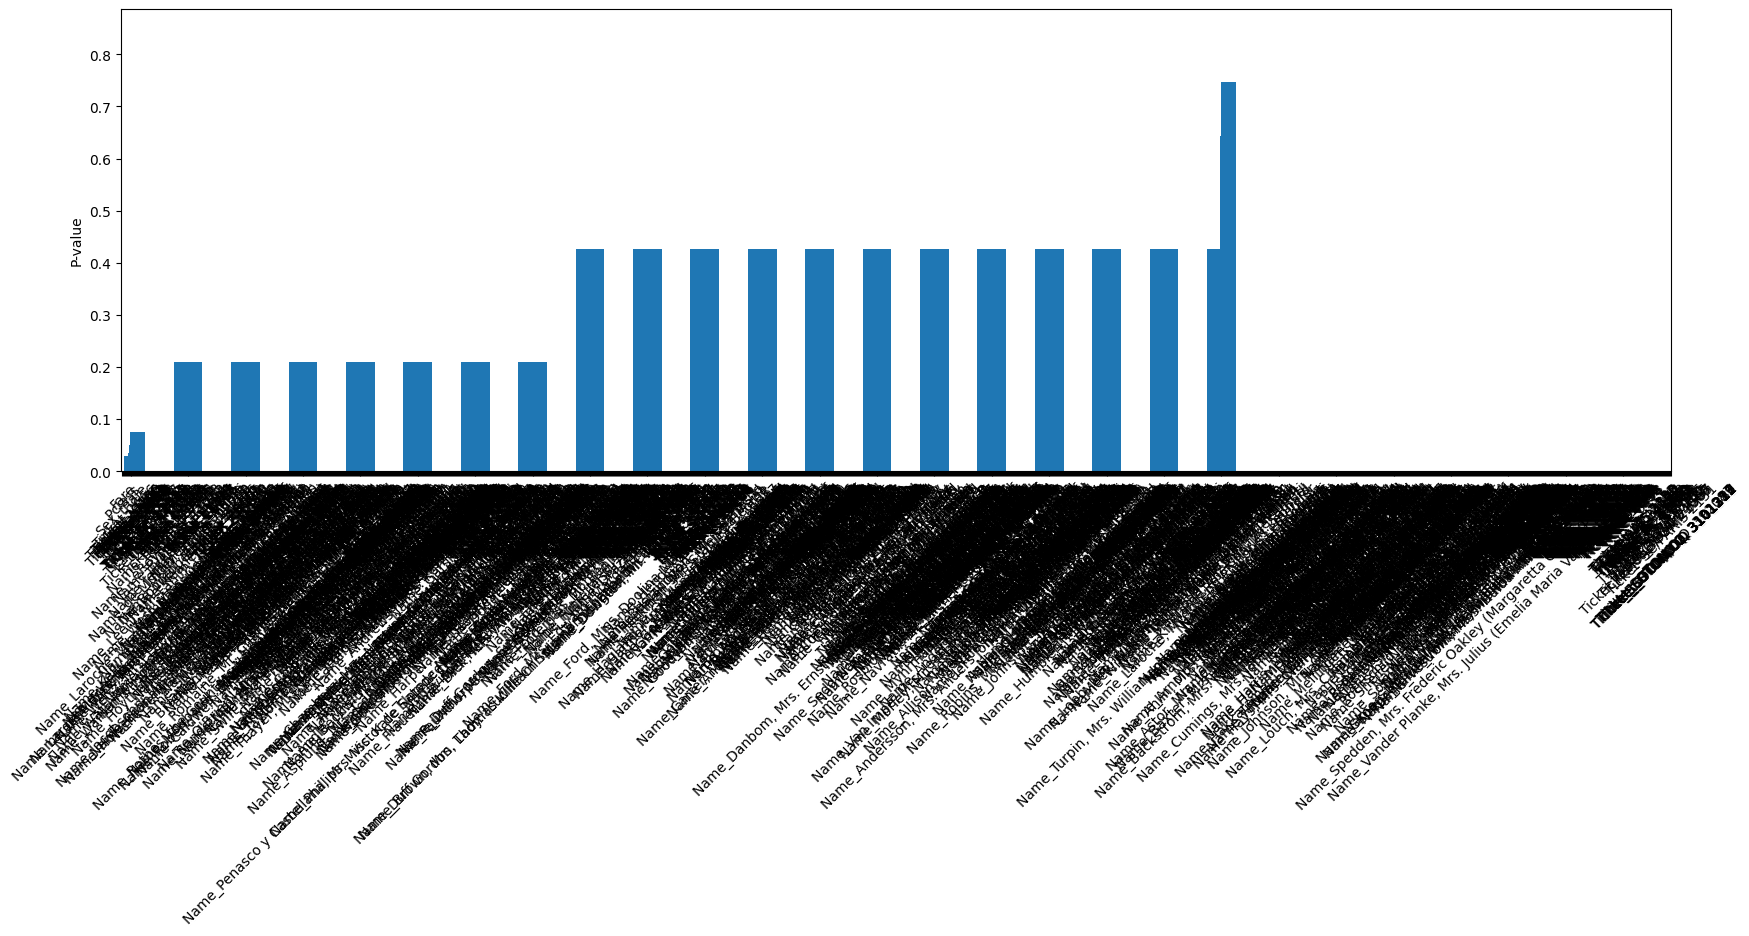

In [14]:
univariate = f_classif(x_train, y_train)
univariate = pd.Series(univariate[1])
univariate.index = x_train.columns
univariate.sort_values(ascending=True).plot.bar(figsize=(20,6),rot=45)
plt.ylabel('P-value')
plt.show()

Text(0.5, 1.0, 'Feature importance based on chi-square test')

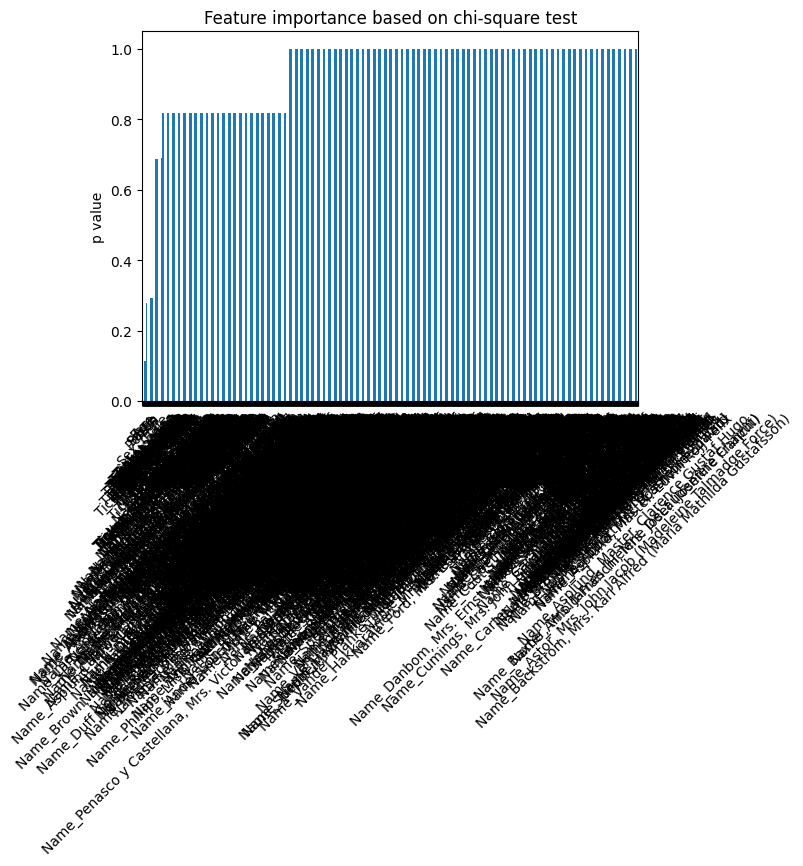

In [15]:
from scipy.stats import chi2_contingency
m=pd.crosstab(y_train,x_train['Sex_male'])
chi_ls=[]
for feature in x_train.columns:
    c = pd.crosstab(y_train, x_train[feature])
    if c.shape[1]>1:
      p_value = chi2_contingency(c)[1]
      chi_ls.append(p_value)
    else:
      p_value=1
      chi_ls.append(p_value)
pd.Series(chi_ls, index=x_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel("p value")
plt.title("Feature importance based on chi-square test")



In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [17]:
constant_features=[features for features in x_train.columns if x_train[features].std()==0]


In [18]:
len(constant_features)

439

In [19]:
x_train.drop(labels=constant_features,axis=1,inplace=True)
x_test.drop(labels=constant_features,axis=1,inplace=True)

In [20]:
quasi_constant_feat=[]

In [21]:
for feature in x_train.columns:
  predominant=(x_train[feature].value_counts()/float(len(x_train))).sort_values(ascending=False).values[0]
  if predominant>0.999:
    quasi_constant_feat.append(feature)
len(quasi_constant_feat)

0

In [22]:
duplicated_feet=[]
for i in range(0,len(x_train.columns)):
  col_1=x_train.columns[i]
  for col_2 in x_train.columns[i+1:]:
    if x_train[col_1].equals(x_train):
       duplicated_feat.append(col_2)

In [23]:
duplicated_features=set(duplicated_feet)# it is used to get unique values
print(len(duplicated_feet))

0


In [24]:
# Correlation
grouped_feature_ls=[]
correlated_groups=[]
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
          if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
            colname = corr_matrix.columns[i]  # getting the name of column
            col_corr.add(colname)
    return col_corr

In [25]:
corr_features=correlation(x_train,0.7)
correlated_features=set(corr_features)
print(len(correlated_features))

486


In [26]:
x_train.drop(labels=correlated_features,axis=1,inplace=True)
x_test.drop(labels=correlated_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((623, 652), (268, 652))

<Axes: >

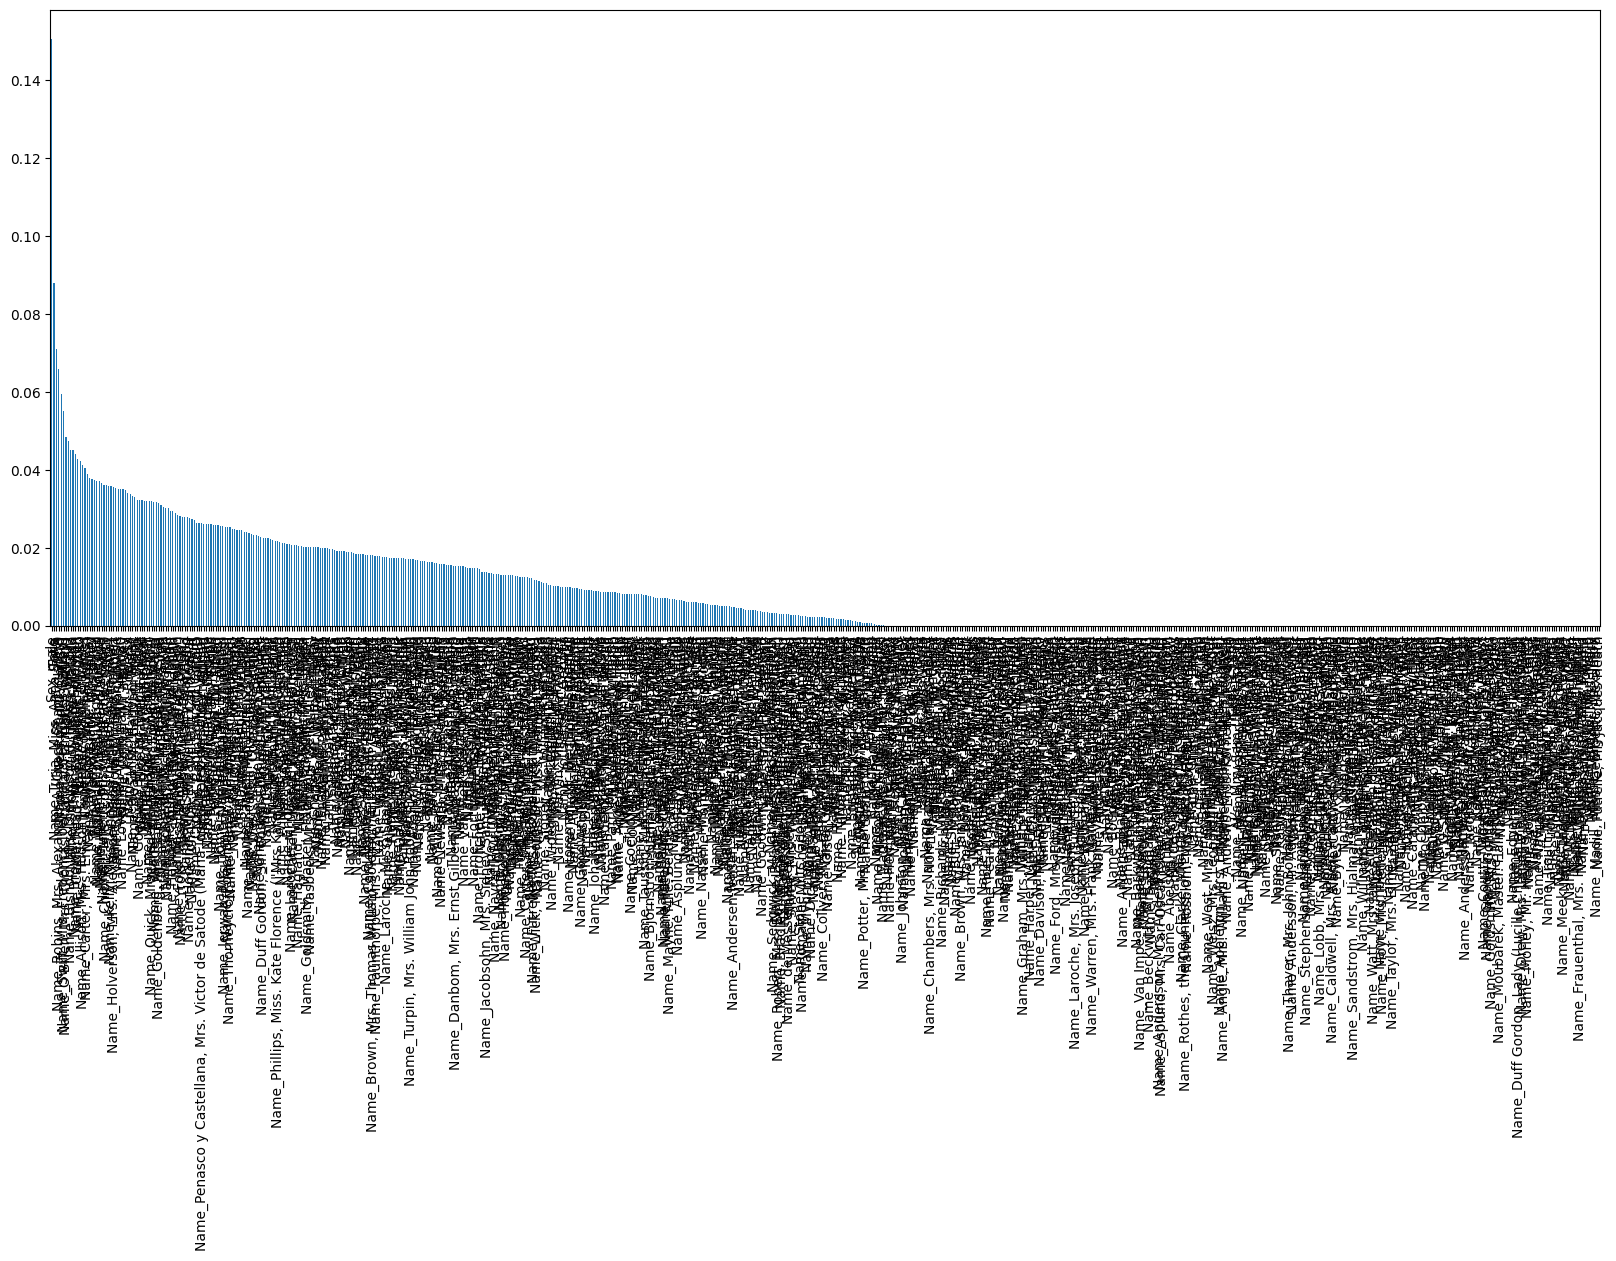

In [27]:
# Mutual Information
from sklearn.feature_selection import SelectKBest, mutual_info_classif
mi = mutual_info_classif(x_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = x_train.columns
mi.sort_values(ascending=False)
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [28]:
sel_ = SelectKBest(mutual_info_classif, k=10).fit(x_train.fillna(0), y_train)
x_train.columns[sel_.get_support()]

Index(['Pclass', 'SibSp', 'Fare', 'Name_Coleff, Mr. Satio',
       'Name_Hodges, Mr. Henry Price', 'Name_Johansson, Mr. Karl Johan',
       'Name_Jonkoff, Mr. Lalio', 'Name_Moor, Master. Meier',
       'Name_Panula, Master. Urho Abraham', 'Sex_male'],
      dtype='object')

In [29]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [30]:
X=df1.drop(labels='Survived',axis=1)
y=df1['Survived']

In [31]:
X=pd.get_dummies(X,drop_first=True)

In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [33]:
def correlation(dataset,threshold):
  col_corr=set()
  corr_matrix=dataset.corr()
  for i in range(len(corr_matrix.columns)):
        for j in range(i):
          if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            col_corr.add(colname)
  return col_corr
corr_features = correlation(x_train, 0.8)
print("correlated features:",len(corr_features))

correlated features: 433


In [34]:
x_train.drop(labels=corr_features, axis=1, inplace=True)
x_test.drop(labels=corr_features, axis=1, inplace=True)


In [ ]:
sfs1=SFS(RandomForestClassifier(n_jobs=4),k_features=5,forward=True,verbose=2,scoring='accuracy',cv=3)
sfs1 = sfs1.fit(np.array(x_train.fillna(0)), y_train)
print('Best accuracy score: %.2f' % sfs.k_score_)
print('Best subset (indices):', sfs.k_feature_idx_)
print('Best subset (corresponding names):', sfs.k_feature_names_)

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   29.7s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  1.9min
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:  4.6min
[Parallel(n_jobs=1)]: Done 647 tasks      | elapsed:  8.3min
[Parallel(n_jobs=1)]: Done 1012 tasks      | elapsed: 12.6min
[Parallel(n_jobs=1)]: Done 1144 out of 1144 | elapsed: 14.2min finished

[2025-08-13 09:39:36] Features: 1/5 -- score: 0.7865725257029604[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   39.5s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  2.2min
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:  4.6min


In [ ]:
sfs1=SFS(RandomForestClassifier(n_jobs=4),k_features=5,forward=False,verbose=2,scoring='accuracy',cv=3)
sfs1 = sfs1.fit(np.array(x_train.fillna(0)), y_train)
print('Best accuracy score: %.2f' % sfs.k_score_)
print('Best subset (indices):', sfs.k_feature_idx_)
print('Best subset (corresponding names):', sfs.k_feature_names_)

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
efs=EFS(RandomForestClassifier(n_jobs=4),min_features=1,max_features=4,scoring='accuracy',cv=5)
efs=efs.fit(np.array(x_train,y_train))
print('Best accuracy score: %.2f' % sfs.k_score_)
print('Best subset (indices):', sfs.k_feature_idx_)
print('Best subset (corresponding names):', sfs.k_feature_names_)
efs_results = pd.DataFrame.from_dict(efs.get_metric_dict()).T
efs_results.sort_values(by='avg_score', ascending=True, inplace=True)
efs_results